# Evaluation Project - Haberman survival Data Set

The Haberman dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

In [2]:
# loading the  haberman survival data set
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

haberman=pd.read_csv("haberman.csv")


In [35]:
haberman.head(10)

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,2
8,34,66,9,2
9,34,58,30,1


Objective of the haberman data set : - Using EDA , come up with a Survival Duration Model about the patient who underwent surgery for the breast cancer.
Survival duration model - To come up with the analysis that how many patients who underwent breast cancer surgery lived either for more than 5 years or less than 5 years.
Above Data set has one feature named status , which has value 1 or 2.
Status 1-patient lived for 5 or more years.
Status 2 - patient lived for 5 or less years.
Therefore status is class for this data set.

In [3]:
# calculating no of data points and coulmns
print(haberman.shape)

(306, 4)


Above data set has 306 data points /rows, 4 features including the class(status)

In [4]:
#to get no of features
print(haberman.columns)


Index(['age', 'year', 'nodes', 'status'], dtype='object')


Observation :
Following is the description of the columns :
a) age - this column has the age of the patient.
b) year - this column reflects the year in which the surgery took place .
c) node - this feature reflects the measurement of the axillary node which causes breast cancer .
d) status - it actually reflects the number 1 or 2 , which says patient lived for more than 5 years or less than 5 years respectively.

In [5]:
#data points per class
haberman["status"].value_counts()


1    225
2     81
Name: status, dtype: int64

From this data set we can say that 225 patients have lived for more than 5 years and 81 patients have lived for less than 5 years . 
As the these number are not same , it is concluded that haberman sirvival data set is unbalanced.


# Null/Missing Value analysis

In [25]:
haberman.isnull().sum()

age       0
year      0
nodes     0
status    0
dtype: int64

# Performing Univariate Analysis

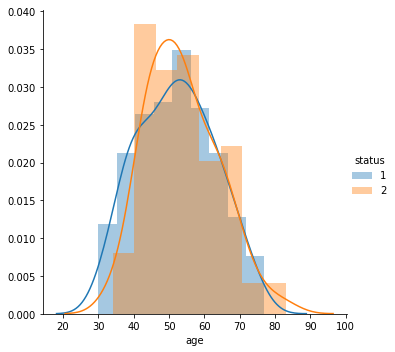

In [6]:
import warnings
warnings.filterwarnings("ignore")

#Plotting Probablity Density Function Curve for the age : -
sns.FacetGrid(haberman,hue="status",size=5)\
    .map(sns.distplot,"age")\
    .add_legend();
plt.show();

Observation :
from above histogram plot we can observe that patients who had age group of 20 to 40 have lived for more than 5 years mostly , and patients having the age from 40 to 60 have  mostly lived for less than 5 years . But we can also see from the graph  about an important fact that the patients who had the age group of 60 to 80 years have either lived more than 5 years or less than 5 years as the graph for status are almost same and if we see the age group of 80 and above we find count of patients living for less than 5 years is greater than living for 5 years or more.

Thus from above histogram we can say that age alone cannot be the factor of deciding the survival duration of the patients undergoing surgery as its contradicting at the age group of 60 years to 80 years.

Therefore we need to look at another feature for our analysis.

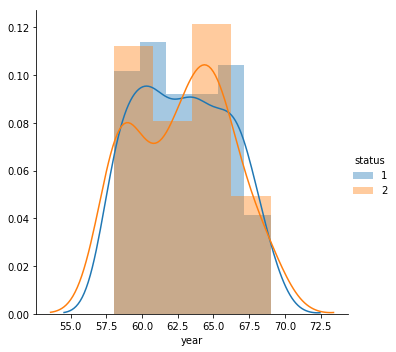

In [7]:
import warnings
warnings.filterwarnings("ignore")

#Plotting Probablity Density Function Curve for the year

sns.FacetGrid(haberman,hue="status",size=5)\
    .map(sns.distplot,"year")\
    .add_legend();
plt.show();

Observation : 
The curves above are almost inseparable .

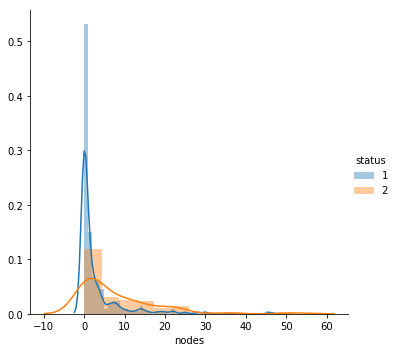

In [8]:
import warnings
warnings.filterwarnings("ignore")

#Plotting Probablity Density Function Curve for the node feature
sns.FacetGrid(haberman,hue="status",size=5)\
    .map(sns.distplot,"nodes")\
    .add_legend();
plt.show();

Observation : 
    
From the above curve we can conclude that curves are seperable and can be used for modelling

   a)  for -10 < nodes <-2 
            count of status 2 is higher 
        
   b) for -2 < node < 5
           count of status 1 is higher
        
   c) for  nodes > 5
          count of status 2 is slightly higher
          
  we conclude by observing from the above graph that as node is becoming more positive the chance of surival is becoming less. 
  Hence we can say that the patients having the node greater than 5 has high chance of living less than 5 years.
  
 In addition to the above conclusion , it can be stated that node could be the factor which can alone decide the survival duration of the patient.

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
[0.83555556 0.91555556 0.93777778 0.96444444 0.98222222 0.98666667
 0.99555556 0.99555556 0.99555556 1.        ]
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]
[0.56790123 0.71604938 0.85185185 0.90123457 0.97530864 0.97530864
 0.98765432 0.98765432 0.98765432 1.        ]


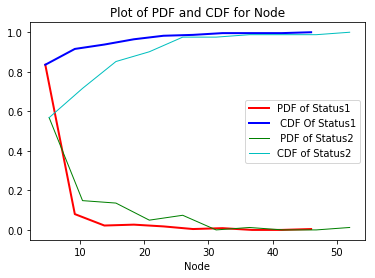

In [9]:
#plotting cdf for nodes
#status 1
haberman_node=haberman.loc[haberman["status"] == 1];
haberman_node2=haberman.loc[haberman["status"]== 2];
counts , bin_edges = np.histogram(haberman_node["nodes"],bins =10, density=True)
pdf=counts/(sum(counts));
print(pdf);
print(bin_edges)
cdf=np.cumsum(pdf)
print(cdf)
lines=plt.plot(bin_edges[1:],pdf);
plt.setp(lines, color='r', linewidth=2.0 , label = "PDF of Status1")
line1=plt.plot(bin_edges[1:], cdf);
plt.setp(line1, color='b', linewidth=2.0, label = " CDF Of Status1")


#status 2
counts , bin_edges = np.histogram(haberman_node2["nodes"],bins =10, density=True)
pdf=counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf=np.cumsum(pdf)
print(cdf)
line3 = plt.plot(bin_edges[1:],pdf);
plt.setp(line3, color='g', linewidth=1.0 , label = " PDF of Status2" )
line2=plt.plot(bin_edges[1:],cdf);
plt.setp(line2, color='c', linewidth=1.0 , label = "CDF of Status2" )
plt.legend()
plt.title("Plot of PDF and CDF for Node")
plt.xlabel("Node")
plt.show()




Observation: 
As we walk through the curve of cdf respectively for status 1 and status 2 we can say that nodes between 0 to 5 have high chances of survival for more than 5 years . But as we move forward we find that as node increases survival duration of stalso increases.
 
Therefore if we talk in numbers , it is noticed from the above graph that patients having nodes less than 5 with high probabilty has high chance that they would survive more than 5 years.But if the nodes are higher than 5, the patients may or not survive for more than 5 years.

     
  

[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]
[0.05333333 0.16       0.28444444 0.37777778 0.54222222 0.70666667
 0.8        0.91111111 0.97333333 1.        ]
[0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]
[0.03703704 0.16049383 0.35802469 0.55555556 0.69135802 0.81481481
 0.91358025 0.96296296 0.98765432 1.        ]


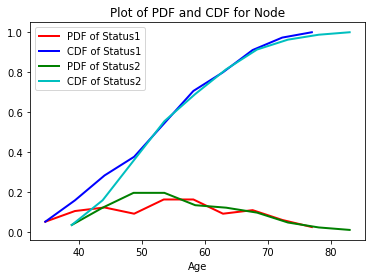

In [10]:
#plotting cdf for age
#status 1
haberman_age1=haberman.loc[haberman["status"] == 1];
haberman_age2=haberman.loc[haberman["status"]== 2];
counts , bin_edges = np.histogram(haberman_age1["age"],bins =10, density=True)
pdf=counts/(sum(counts));
print(pdf);
print(bin_edges)
cdf=np.cumsum(pdf)
print(cdf)
lines = plt.plot(bin_edges[1:],pdf);
plt.setp(lines, color='r', linewidth=2.0 , label = "PDF of Status1")
line1=plt.plot(bin_edges[1:],cdf);
plt.setp(line1, color='b', linewidth=2.0 , label = "CDF of Status1")

#status 2
counts , bin_edges = np.histogram(haberman_age2["age"],bins =10, density=True)
pdf=counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf=np.cumsum(pdf)
print(cdf)
line2 = plt.plot(bin_edges[1:],pdf);
plt.setp(line2, color='g', linewidth=2.0 , label = "PDF of Status2")
line3 = plt.plot(bin_edges[1:],cdf);
plt.setp(line3, color='c', linewidth=2.0 , label = "CDF of Status2")
plt.legend()
plt.title("Plot of PDF and CDF for Node")
plt.xlabel("Age")

plt.show()

As the curve reflects the patients with age less than 50 has high chance that they would survive for more than 5 years , and hence would fall under status 1 of the haberman data set.
If we talk about the duration less than  5 years , we are still skeptical as the curve is not clearly separable.
Therefore there is a need to compare features or take other plots into considerations.

# BIVARIATE ANALYSIS : 

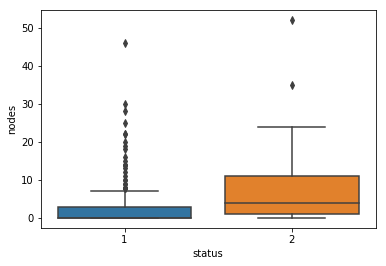

In [11]:
# bOX plot for Node
sns.boxplot(x='status',y='nodes',data=haberman)
plt.show()


The two box plots help us to identify the percentile of the sirvival data sets .
It is clearly reflected in box plot for status 2 that nodes which are more positive are likely to survive for less than 5 years.
We can state that around 80 % of patients survived less than 5 years were having nodes above 5(approximately)

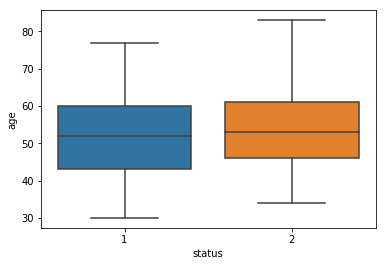

In [12]:
# bOX plot for age
sns.boxplot(x='status',y='age',data=haberman)
plt.show()

Box Plots for age is not easily separable.

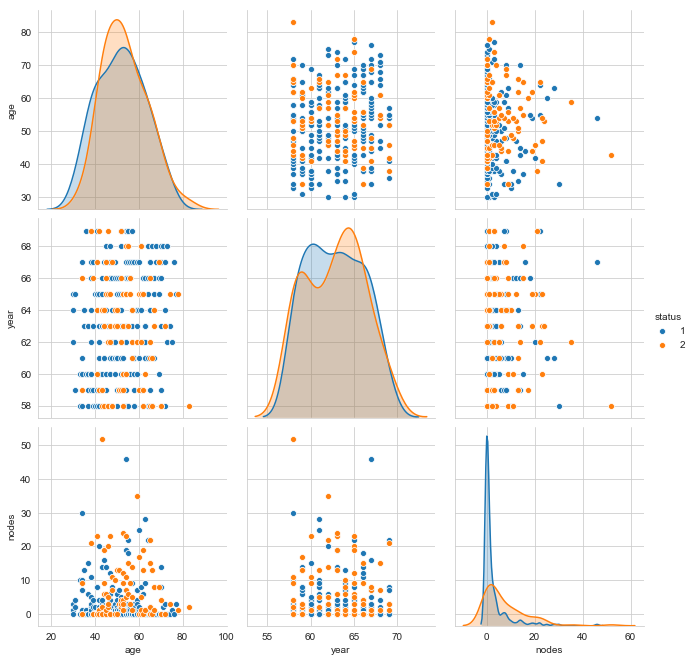

In [13]:
import warnings
warnings.filterwarnings("ignore")
#pair plots
plt.close();
sns.set_style("whitegrid")
sns.pairplot(haberman,hue="status",vars=["age","year","nodes"],size=3)
plt.show()


from the above pair plots we found node vs age , age histogram ,node histogram useful , therefore used that.

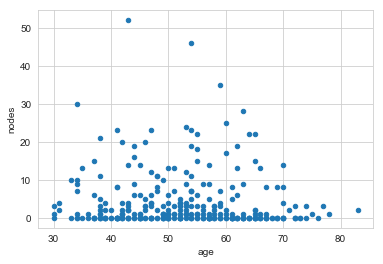

In [14]:
sns.set_style("whitegrid")
haberman.plot(kind='scatter',x='age',y='nodes')
plt.show()


# CorRelation Matrix
A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. A correlation matrix is used to summarize data, as an input into a more advanced analysis, and as a diagnostic for advanced analyses.

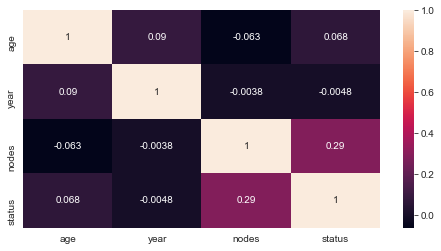

In [17]:
df_cor=haberman.corr()
plt.figure(figsize=(8,4))
sns.heatmap(df_cor , annot =True)

# Feature selection based on correlation matrix
From the below code I have removed the features which are having correlation of more than 0.9. This results in stable parameter estimates of classification which makes it easy to assess the effect of independent variables on dependent variables

In [18]:
columns = np.full((df_cor.shape[0]),True,dtype=bool)
for i in range(df_cor.shape[0]):
    for j in range(i+1, df_cor.shape[0]):
        if df_cor.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = haberman.columns[columns]
haberman = haberman[selected_columns]

In [20]:
haberman.shape

(306, 4)

In [21]:
from  scipy.stats import zscore
zs=np.abs(zscore(haberman))
zs

array([[2.08214014, 0.35358406, 0.42159203, 0.6       ],
       [2.08214014, 0.26292148, 0.14295885, 0.6       ],
       [2.08214014, 0.66183684, 0.56090862, 0.6       ],
       ...,
       [2.2754471 , 0.66183684, 0.14295885, 0.6       ],
       [2.36816172, 0.66183684, 0.42159203, 1.66666667],
       [2.83173483, 1.49593258, 0.28227544, 1.66666667]])

In [23]:
df=haberman[(zs<3).all(axis=1)]
df

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
...,...,...,...,...
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2


In [24]:
print('shape of the data with outliers  ' ,haberman.shape)
print('shape of the data without  outliers  ' ,df.shape)

shape of the data with outliers   (306, 4)
shape of the data without  outliers   (301, 4)


# Applying Various Classification Models
In this section we will be applying several classification models and hence we will be checking following performance matrix :

1) Accuracy score

2) AUC Score

3) Mean of crossing validation score using accuracy as scoring

4) Std Deviation of crossing validation score using accuracy as scoring

5) Confusion Matrix

We have also used GridSearch for tuning the parameters

Importing all the required library

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

# Function for Accuracy Score
This function is built to find the best accuracy score depending on the random state while splitting the model. This function prints the best accuracy score and returns the random state for that accuracy score

In [27]:
def accur_at_rstate(model,x,y):
    random_state=np.arange(42,101)
    accuracy=0
    for r_state in random_state:
        train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=r_state)
        #DT=DecisionTreeClassifier()
        model.fit(train_x,train_y)
        pred = model.predict(test_x)
        #print('The accuracy for the {} is {}'.format(r_state,accuracy_score(test_y,pred_DT)))
        if accuracy_score(test_y,pred) > accuracy:
            accuracy=accuracy_score(test_y,pred)
            Final_r_state=r_state
        #Calculating 
    print('The maximum accuracy reached is {} at random state {}' .format(accuracy,Final_r_state))
    return Final_r_state
    

# Function for Auc Score and Confusion Matrix
This function will result in auc score for model and also print the confusion matrix

In [28]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score
def roc_curve(model,r_state):
    train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=r_state)
    fpr_tr,tpr_tr,threshold = metrics.roc_curve(train_y,model.predict_proba(train_x)[:,1])
    fpr_test,tpr_test,threshold = metrics.roc_curve(test_y,model.predict_proba(test_x)[:,1])
    plt.plot(fpr_tr,tpr_tr ,label="train AUC ="+str(metrics.auc(fpr_tr,tpr_tr)))
    plt.plot(fpr_test,tpr_test ,label="test AUC ="+str(metrics.auc(fpr_test,tpr_test)))
    plt.title('ROC curve')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.legend()
    plt.show()
    pred=model.predict(test_x)
    sns.heatmap(confusion_matrix(test_y,pred),annot=True)

# Function for highest_accuracy
This function finds the highest_accuracy of the model

In [29]:
def highest_accuracy(model,x,y,Final_r_state):
    train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=Final_r_state)
    model.fit(train_x,train_y)
    pred = model.predict(test_x)
    return accuracy_score(test_y,pred)

Below function is created to make a list of highest_accuracy generated by different classifier , so that it can be compared at last, for the selection of the best model

In [30]:
accuracy=[]
def list_accuracy(x):
    accuracy.append(x)
    return accuracy

In [37]:
def partition(x):
    if x==1:
        return 0
    return 1
actualScore = df['status']
ZeroOne = actualScore.map(partition) 
df['status'] = ZeroOne

In [38]:
y=df['status']
x=df.drop(['status'],axis=1)

# 1.DecisionTreeClassifier

In [39]:
from sklearn.model_selection import GridSearchCV
#max_depth = np.arange(30)
depth={'max_depth':range(0,30)}
DT=DecisionTreeClassifier()
gs=GridSearchCV(DT,depth,cv=10)
gs.fit(x,y)
gs.best_params_

{'max_depth': 4}

The maximum accuracy reached is 0.8241758241758241 at random state 47
Cross_val_score  0.6742622950819672


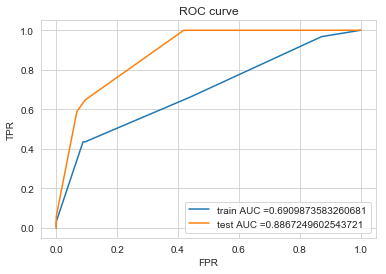

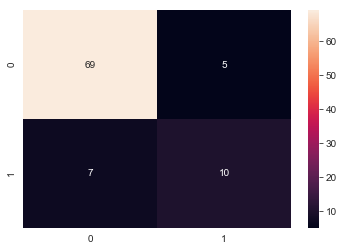

In [40]:
DT=DecisionTreeClassifier(max_depth=4)
Final_Random_state=accur_at_rstate(DT,x,y)
from sklearn.model_selection import cross_val_score
print('Cross_val_score ',cross_val_score(DT,x,y,cv=5 ,scoring='accuracy').mean())
roc_curve(DT,Final_Random_state)

In [41]:
Max_accuracy=highest_accuracy(DT,x,y,Final_Random_state)
List_acc=list_accuracy(Max_accuracy)

# 2.KNeighborsClassifier

In [42]:
from sklearn.model_selection import GridSearchCV
neighbour={'n_neighbors':range(1,50),'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']}
Knn=KNeighborsClassifier()
gs=GridSearchCV(Knn,neighbour,cv=10)
gs.fit(x,y)
gs.best_params_

{'algorithm': 'auto', 'n_neighbors': 35}

The maximum accuracy reached is 0.8461538461538461 at random state 47
Cross_val_score  0.7708743169398907


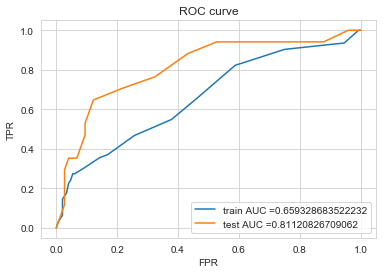

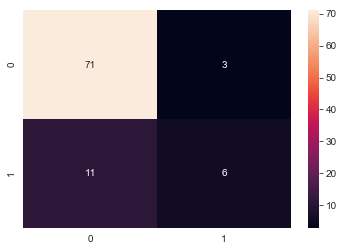

In [43]:
from sklearn.model_selection import cross_val_score
Knn=KNeighborsClassifier(n_neighbors=35,algorithm='auto')
Final_Random_state=accur_at_rstate(Knn,x,y)
print('Cross_val_score ',cross_val_score(Knn,x,y,cv=5 ,scoring='accuracy').mean())
roc_curve(Knn,Final_Random_state)

In [44]:
Max_accuracy=highest_accuracy(Knn,x,y,Final_Random_state)
List_acc=list_accuracy(Max_accuracy)

# 3.Naive Bayes

In [45]:
from sklearn.naive_bayes import BernoulliNB
alpha={'alpha':range(1,30)}
NB=BernoulliNB()
gs=GridSearchCV(NB,alpha,cv=10)
gs.fit(x,y)
gs.best_params_

{'alpha': 1}

The maximum accuracy reached is 0.8131868131868132 at random state 47
Cross_val_score  0.7375409836065574


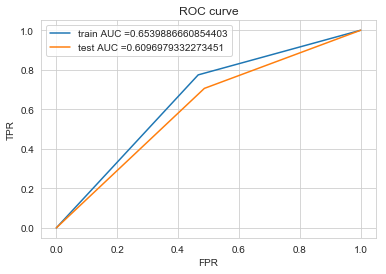

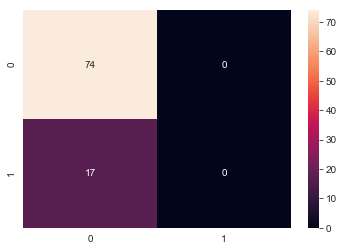

In [46]:
NB=BernoulliNB(alpha=1)
Final_Random_state=accur_at_rstate(NB,x,y)
print('Cross_val_score ',cross_val_score(NB,x,y,cv=5 ,scoring='accuracy').mean())
roc_curve(NB,Final_Random_state)

In [47]:
Max_accuracy=highest_accuracy(NB,x,y,Final_Random_state)
List_acc=list_accuracy(Max_accuracy)

# 4.Support Vector Classifier

In [48]:
gamma={'gamma':range(1,30),'kernel':['Poly','rbf']}
svc=SVC()
gs=GridSearchCV(svc,gamma,cv=10)
gs.fit(x,y)
gs.best_params_

{'gamma': 1, 'kernel': 'rbf'}

In [49]:
svc=SVC(gamma=1,kernel='rbf')
Final_Random_state=accur_at_rstate(svc,x,y)
print('Cross_val_score ',cross_val_score(svc,x,y,cv=5 ,scoring='accuracy').mean())

The maximum accuracy reached is 0.8021978021978022 at random state 80
Cross_val_score  0.7375409836065574


In [50]:
Max_accuracy=highest_accuracy(svc,x,y,Final_Random_state)
List_acc=list_accuracy(Max_accuracy)

# 5.Logistic Regression

In [51]:
C={'C':range(1,30),'penalty':['l1', 'l2', 'elasticnet']}
log=LogisticRegression()
gs=GridSearchCV(log,C,cv=10)
gs.fit(x,y)
gs.best_params_

{'C': 1, 'penalty': 'l2'}

The maximum accuracy reached is 0.8461538461538461 at random state 54
Cross_val_score  0.7607650273224043


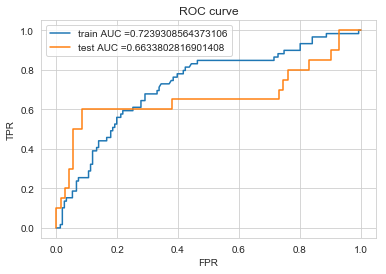

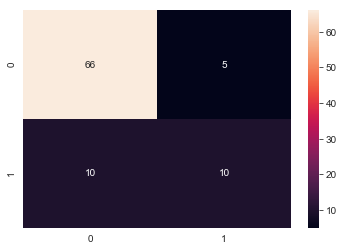

In [52]:
log=LogisticRegression(C=1,penalty='l2')
Final_Random_state=accur_at_rstate(log,x,y)
print('Cross_val_score ',cross_val_score(log,x,y,cv=5 ,scoring='accuracy').mean())
roc_curve(log,Final_Random_state)

In [53]:
Max_accuracy=highest_accuracy(log,x,y,Final_Random_state)
List_acc=list_accuracy(Max_accuracy)

# Appying ensemble model for better results


# 1.RandomForestClassifier

In [54]:
from sklearn.ensemble import RandomForestClassifier
parameters={'n_estimators':range(1,50),'max_depth':range(1,30)}
RF=RandomForestClassifier()
gs=GridSearchCV(RF,parameters,cv=10)
gs.fit(x,y)
gs.best_params_

{'max_depth': 2, 'n_estimators': 2}

The maximum accuracy reached is 0.8021978021978022 at random state 47
Cross_val_score  0.7408743169398908


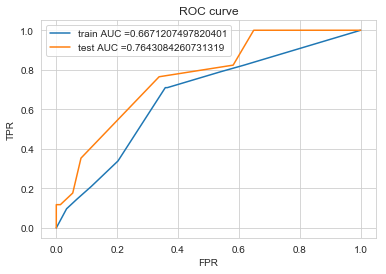

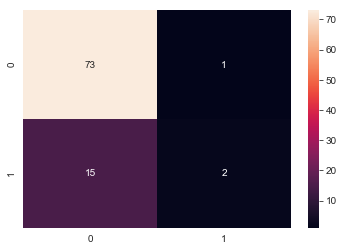

In [55]:
RF=RandomForestClassifier(n_estimators=2,max_depth=2)
Final_Random_state=accur_at_rstate(RF,x,y)
print('Cross_val_score ',cross_val_score(RF,x,y,cv=5 ,scoring='accuracy').mean())
roc_curve(RF,Final_Random_state)

In [56]:
Max_accuracy=highest_accuracy(RF,x,y,Final_Random_state)
List_acc=list_accuracy(Max_accuracy)

# 2.BaggingClassifier

In [57]:
from sklearn.ensemble import BaggingClassifier
parameters={'n_estimators':range(1,30),'base_estimator':[log,NB,Knn,DT]}
BG=BaggingClassifier()
gs=GridSearchCV(BG,parameters,cv=10)
gs.fit(x,y)
gs.best_params_

{'base_estimator': KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                      metric_params=None, n_jobs=None, n_neighbors=35, p=2,
                      weights='uniform'), 'n_estimators': 11}

The maximum accuracy reached is 0.8461538461538461 at random state 47
Cross_val_score  0.774207650273224


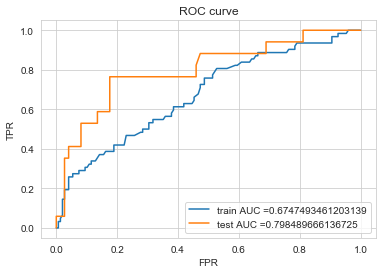

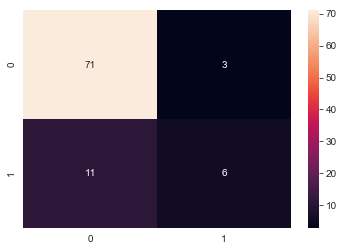

In [58]:
BG=BaggingClassifier(n_estimators=11,base_estimator=Knn)
Final_Random_state=accur_at_rstate(BG,x,y)
print('Cross_val_score ',cross_val_score(BG,x,y,cv=5 ,scoring='accuracy').mean())
roc_curve(BG,Final_Random_state)

In [59]:
Max_accuracy=highest_accuracy(BG,x,y,Final_Random_state)
List_acc=list_accuracy(Max_accuracy)

# Plotting Bargraph to Analyse the Performance Matrix

In [60]:
model =['DT','KNN','NB','LOG','RF','SVC','BAGGING']

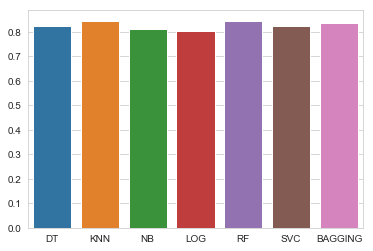

In [61]:
sns.barplot(x=model,y=List_acc)

from the above barplot --> KNeighborsClassifier has highest accuracy

After performing several classification models on this data set and after analysing the performance matrix for all the models , it is concluded that KNeighborsClassifier is giving the best results which are as follows :

The maximum accuracy reached is 0.8461538461538461 at random state 47

Cross_val_score  0.7708743169398907

Therefore KNeighborsClassifier is selected as our final model

# Final Model ----> KNeighborsClassifier

Accuracy 0.8461538461538461
--------------------------------------


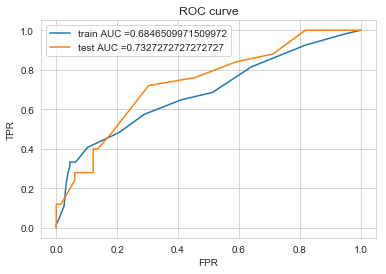

-----------------Confusion Matrix---------------------


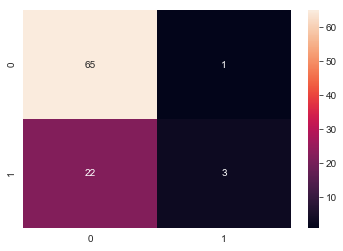

In [62]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=47)
Knn=KNeighborsClassifier(n_neighbors=35,algorithm='auto')
Knn.fit(train_x,train_y)
pred = Knn.predict(test_x)
print('Accuracy',accuracy_score(test_y,pred))
print('--------------------------------------')
roc_curve(Knn,35)
print('-----------------Confusion Matrix---------------------')


In [63]:
print('classification Report \n',classification_report(test_y,pred))

classification Report 
               precision    recall  f1-score   support

           0       0.87      0.96      0.91        74
           1       0.67      0.35      0.46        17

    accuracy                           0.85        91
   macro avg       0.77      0.66      0.69        91
weighted avg       0.83      0.85      0.83        91



In [64]:
print('mean cross_val_score',cross_val_score(Knn,x,y,cv=5,scoring='accuracy').mean())
print('std deviation of cross_val_score',cross_val_score(Knn,x,y,cv=5,scoring='accuracy').std())

mean cross_val_score 0.7708743169398907
std deviation of cross_val_score 0.033083178511278045


In [65]:
df_output=pd.DataFrame()
df_output['Status_Actual']=test_y
df_output['Status_predicted']=pred
df_output

,Status_Actual,Status_predicted
256,0,0
209,0,0
132,0,0
36,0,0
5,0,0
...,...,...
121,0,0
262,0,0
196,0,0
124,1,1


# Saving the predcited vs actual loan status values

In [66]:
df_output[['Status_Actual','Status_predicted']].to_csv('status_output.csv',index=False)

# Conclusion:-

Haberman Data set is the set of data which has the details of the age , nodes , year of the surgery , and surivial status of the patients who underwent breast cancer surgery .

As per our objective we were needed to find the survival duration of the patients on the basis of the different feature .

In our analysis we compared the feature of the data set by different plots and eventually came to a conclusion which is as follows:-


a) It is concluded that if node is less than 5 then  there  is a very high probality that patient will survive for more than 5 year.

b) if the age is less than 50 years there is a chance that patient will survive for more than 5 years provided that the nodes are not on the higher positive side ,if age > 40 and less < 70 we also find count of higher positive nodes but age  alone cannot determine the status

Thereofore node becomes an important feature, hence if the node are less positive ,that is less than 5 , will survive for more than 5 years and vice versa.

Classification Modelling:-

With the help of this data set I have tried to predict the status using ML algorithM

In this project we have performed Null value analysis ,Univariate analysis ,Bivariate analysis amd several EDA techniques.

I performed several clasiification algorithm and based on the accuracy we have finalised KNeighborsClassifier as the best model for this dataset and I also checked the cross validate score for this model in order to analyse underfit/Overfit of the data.


At last I have saved the model and the predicted status.



    